<h1>Exploratory Data Analysis on Titanic Dataset</h1>
</code>
<img style="display: block;-webkit-user-select: none;margin: auto;cursor: zoom-in;background-color: hsl(0, 0%, 90%);transition: background-color 300ms;" src="https://res.cloudinary.com/zenbusiness/q_auto,w_1200,h_800,c_lfill/v1/shared-assets/s2/raster/titanic.jpg" width="981" height="654">

## Introduction ##
The Titanic dataset is one of the most well-known datasets used for learning data visualization, exploratory analysis, and machine learning. It provides information about the passengers on the Titanic, including features such as age, gender, passenger class (Pclass), fare, embarkation port, and survival status (Survived). In Seaborn, the Titanic dataset is often used to demonstrate various visualization techniques, as it contains both numerical and categorical data. For instance, bar plots, histograms, and box plots can be used to explore survival rates across different groups (e.g., gender or passenger class). Pair plots and scatter plots can help identify relationships between variables such as age and fare. Seaborn also makes it easy to include hue-based distinctions for survival, allowing users to visually explore how different factors contributed to survival probabilities. Overall, the Titanic dataset serves as a versatile tool for learning data analysis and visualization using Seaborn.
The Titanic dataset loaded from Seaborn contains the following columns:

1. **survived**: A binary column indicating whether the passenger survived (1 = survived, 0 = did not survive).
2. **pclass**: Passenger class (1 = First class, 2 = Second class, 3 = Third class), representing socio-economic status.
3. **sex**: The gender of the passenger (male or female).
4. **age**: The age of the passenger, which may include missing values.
5. **sibsp**: The number of siblings or spouses the passenger had aboard the Titanic.
6. **parch**: The number of parents or children the passenger had aboard.
7. **fare**: The fare paid by the passenger for their ticket.
8. **embarked**: The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).
9. **class**: The passenger class as a categorical variable (First, Second, Third), a duplicate of the `pclass` column.
10. **who**: A simplified categorization of the passenger based on gender and age (man, woman, child).
11. **adult_male**: A boolean column indicating whether the passenger is an adult male (True or False).
12. **deck**: The deck level of the passenger's cabin, which contains many missing values.
13. **embark_town**: The name of the town where the passenger embarked (Cherbourg, Queenstown, Southampton).
14. **alive**: A categorical column indicating survival status (yes = survived, no = did not survive).
15. **alone**: A boolean column indicating whether the passenger was traveling alone (True = traveling alone, False = not alone).

This dataset is well-suited for exploratory data analysis, allowing insights into factors influencing survival, such as class, gender, age, and family size. The mix of numerical, categorical, and boolean columns makes it a versatile dataset for both visualization and predictive modeling.


In [1]:
#Load the Data and show basic information about the data

# used to working with pandas methods and data wrangling
import pandas as pd   

# used to load the 'titanic' dataset  
import seaborn as sns 

# used to numeric calculations (in this lecture used for numpy where function)
import numpy as np   

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid") 
plt.style.use("seaborn") 



In [2]:
# load the 'titanic' dataset from seaborn package
titanic = sns.load_dataset(name='titanic')

In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
#these columns: pclass, who ,adult_male, embark_town, alive will be droped cause of Repetitive content with other columns.
df=titanic.drop(labels=['class','who','adult_male','embark_town','alive','alone'],axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 57.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Dealing with Missing Values ##
When addressing the issue of missing values in the Titanic dataset, different strategies can be applied to fill the data based on the nature of the data in each colum. 

In [7]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

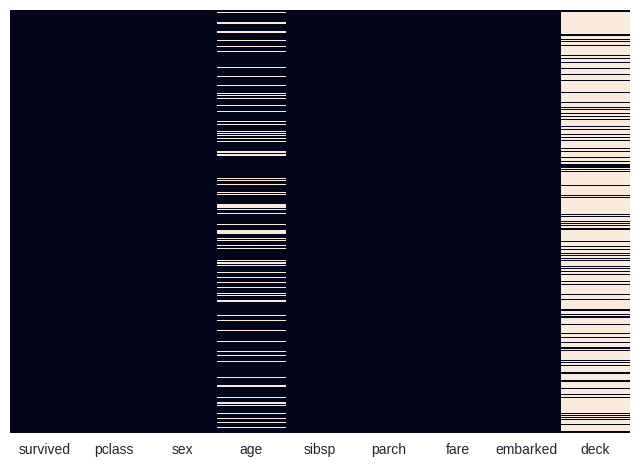

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);

Roughly 20% of the age data is missing the proportion of age missing is likely a small knob for reasonable replaced replacement with some forms of imputation. looking at the deck column, it's looks like we are just missing too much of the data to do something useful with as a basic level will probably drop this later

**1. age :**

we want to feel in missing age data instead of just dropping the missing age data rows one way to do this is by feeling in the mean age of all the passengers however we can be a smarter about these and check the average age by passenger class

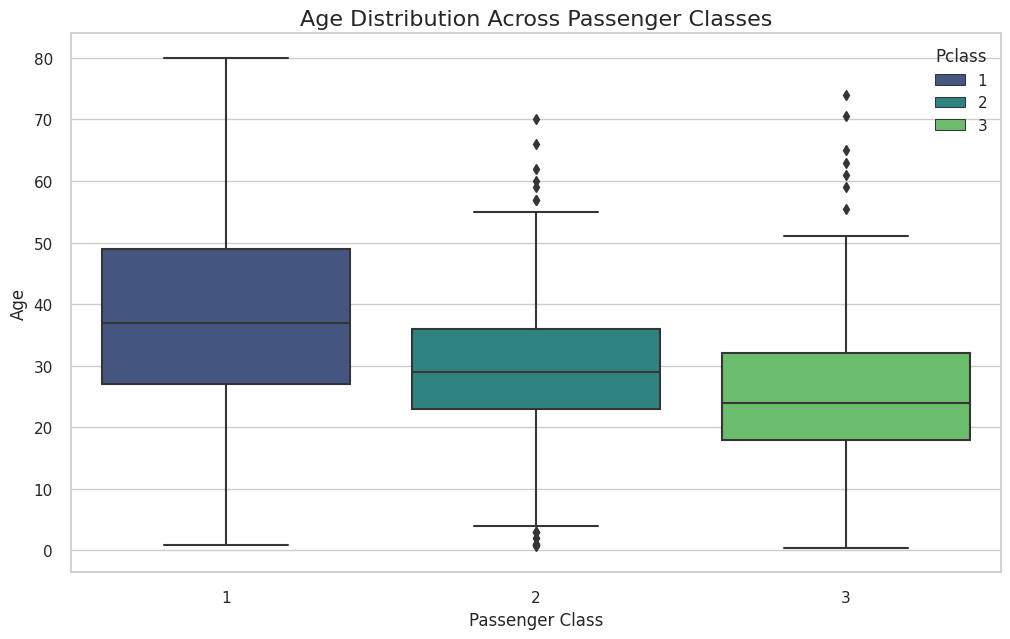

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Boxplot without misalignment
sns.boxplot(x='pclass', y='age', data=df, hue='pclass', palette='viridis', dodge=False)

# Add titles and labels
plt.title("Age Distribution Across Passenger Classes", fontsize=16)
plt.xlabel("Passenger Class", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend(title="Pclass", loc="upper right")

plt.show()


The wealthier passengers in the higher classes tend to be older which makes sense.we will see use these average age values to impute based on pclass for age.

In [10]:
mean_age_per_pclass = df.groupby('pclass')['age'].mean()

In [11]:
mean_age_per_pclass

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [12]:
import pandas as pd

def fill_missing_age_with_pclass_mean(df):
    """
    Fills missing values in the 'age' column with the mean age for the corresponding 'pclass'.

    Returns:
        pd.DataFrame: DataFrame with missing 'age' values filled.
    """
    # Calculate mean age for each passenger class (pclass)
    mean_age_per_pclass = df.groupby('pclass')['age'].mean()

    # Fill missing age values with the corresponding mean age for their pclass
    df['age'] = df.apply(
        lambda row: mean_age_per_pclass[row['pclass']] if pd.isnull(row['age']) else row['age'],
        axis=1
    )
    return df

df = fill_missing_age_with_pclass_mean(df)
print(df['age'].isnull().sum())  # Should print 0 if all missing values are filled


0


In [13]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

**2. Embarked:**

The mode is used to fill the two missing values in the Embarked column because:

The data is nominal, meaning no category inherently ranks above another.
Only two values are missing, making the mode a straightforward and justifiable choice given its simplicity and the small number of imputations needed.ded.

In [14]:
mode_point = df["embarked"].mode()[0]
df["embarked"].fillna(mode_point,inplace = True)


**3. deck**

Due to the large number of missing values in thedeckn column, (687 out of 891), and very small sample data, we will drop this column

*How Much is Too Much?* These are general guidelines to help you evaluate the impact of data loss on your analysis and decide how to handle missing values effectively.

Less than 5% loss: Minimal impact, acceptable in most cases. Dropping rows or columns is usually fine.


5-10% loss: Moderately acceptable. Check for patterns in missing data. Random missing data is less concerning, but systematic loss could introduce bias.


Above 10% loss: Proceed with caution. Consider using imputation techniques (e.g., mean, median) to fill missing values, as dropping data could distort results.


Above 20% loss: Typically unacceptable. High data loss reduces representativeness and risks invalidating the dataset.

In [15]:
# Drop the original 'deck' column
df.drop(columns=['deck'], inplace=True)

In [16]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

## detect duplicates #

In [17]:
df.duplicated().sum()

111

In [18]:
df = df.drop_duplicates()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.00000,1,0,7.2500,S
1,1,1,female,38.00000,1,0,71.2833,C
2,1,3,female,26.00000,0,0,7.9250,S
3,1,1,female,35.00000,1,0,53.1000,S
4,0,3,male,35.00000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.00000,0,5,29.1250,Q
887,1,1,female,19.00000,0,0,30.0000,S
888,0,3,female,25.14062,1,2,23.4500,S
889,1,1,male,26.00000,0,0,30.0000,C


## Data Visualization ##

Before diving into feature engineering and scaling, it’s crucial to understand the initial distribution and relationships within the data. First of all we will plotbarplots and then histograms to see what the distribution of continuous numerical features(ie. data from Age and Fare column) is like.

To see any outliers within the Age and Fare column, which will help us in deciding what scaling algorithm to use, we also make boxplots.

We make count plots to view the distribution within our categorical variabcus here.

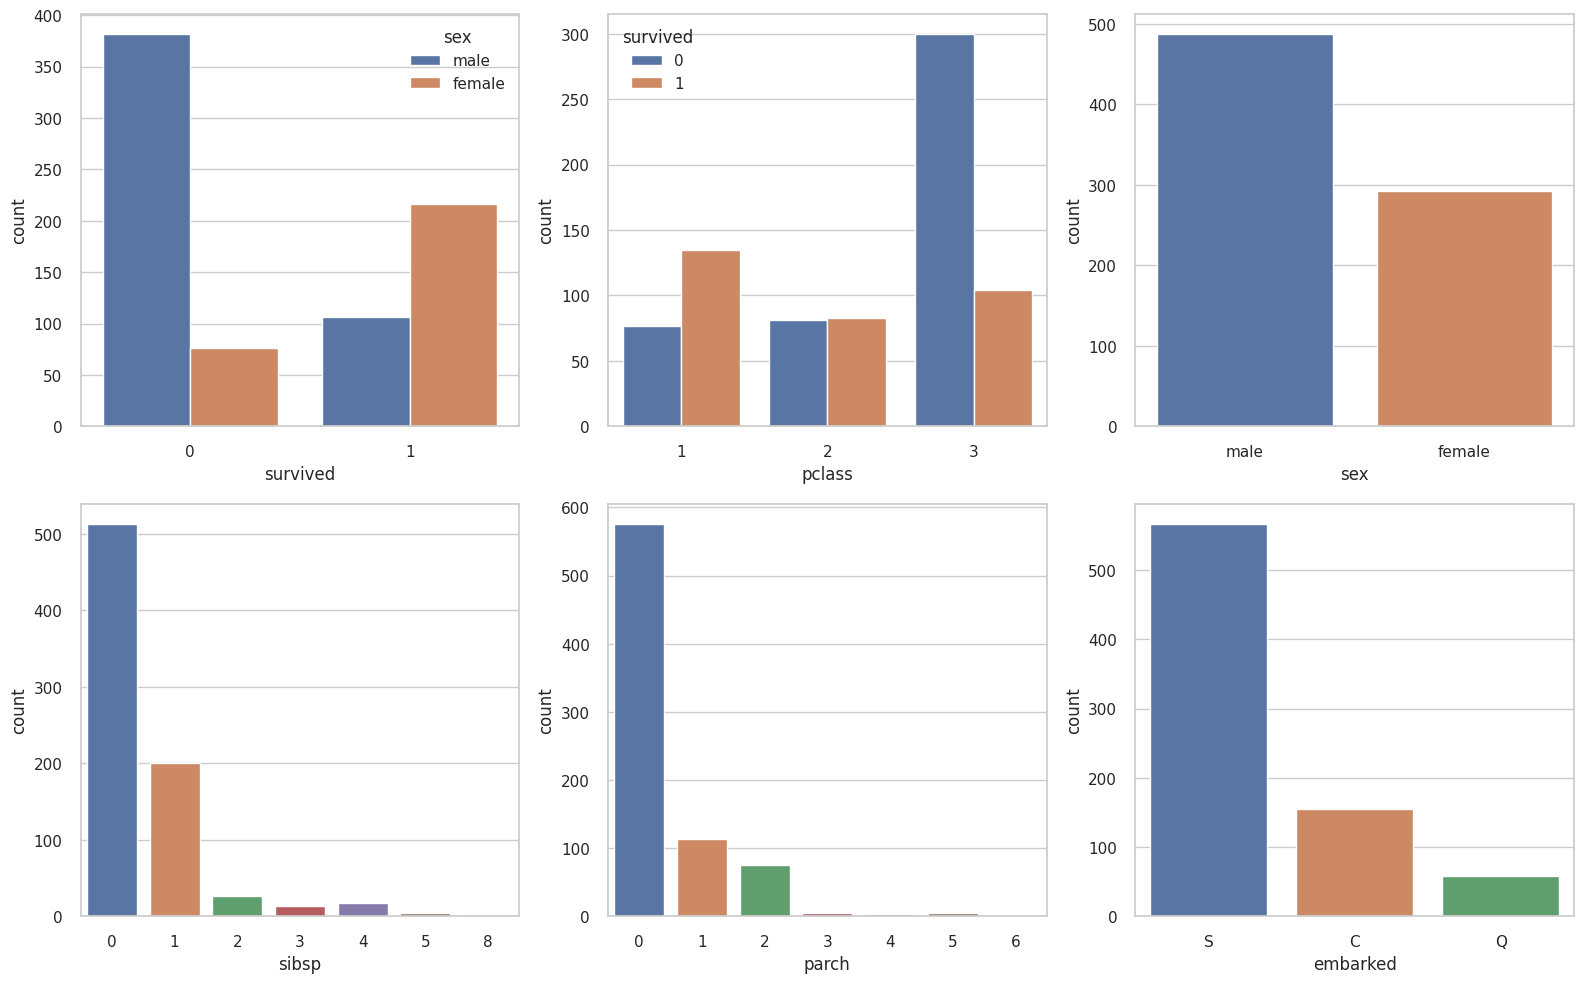

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create plots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.countplot(x='survived', data=df, ax=axes[0, 0], hue='sex')
sns.countplot(x='pclass', data=df, ax=axes[0, 1], hue='survived')
sns.countplot(x='sex', data=df, ax=axes[0, 2])
sns.countplot(x='sibsp', data=df, ax=axes[1, 0])
sns.countplot(x='parch', data=df, ax=axes[1, 1])
sns.countplot(x='embarked', data=df, ax=axes[1, 2])

plt.tight_layout()
plt.show()


## Bivariate EDA ##

We can clearly see that male survial rates is around 20% where as female survial rate is about 75% which suggests that gender has a strong relationship with the survival rates.

There is also a clear relationship between Pclass and the survival by referring to first plot below. Passengers on Pclass1 had a better survial rate of approx 60% whereas passengers on pclass3 had the worst survial rate of approx 

For ‘Embarked’, most passengers embarked from port ‘S’ (Southampton), followed by ‘C’ (Cherbourg) and ‘Q’ (Queenstown). This shows Southampton was the most common embarkation point.22%

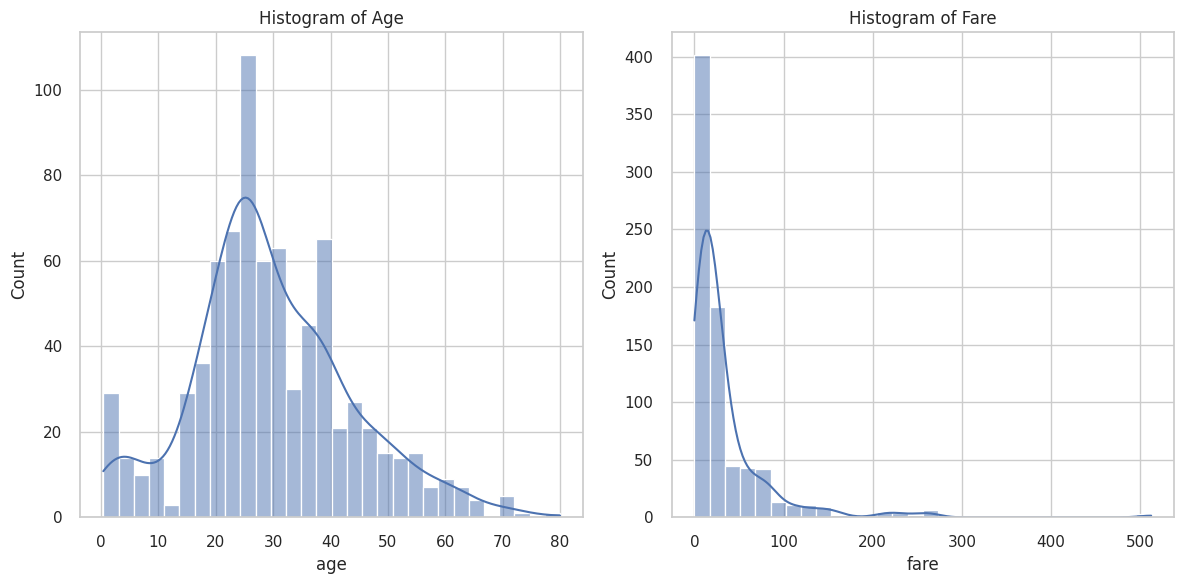

In [20]:
# 1. Histogram and KDE Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Histogram of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['fare'], bins=30, kde=True)
plt.title('Histogram of Fare')

plt.tight_layout()
plt.show()


Histograms for ‘Age’ and ‘Fare’ features reveal their distributions.

The ‘Age’ histogram shows a roughly normal(or Gaussian) distribution (or is it ? More on it at Feature Scaling Part) with a peak around 30 years old, slightly right-skewed, indicating a few older passengers.

The ‘Fare’ histogram is highly right-skewed, with most values at the lower end and significant outliers extending up to 500.

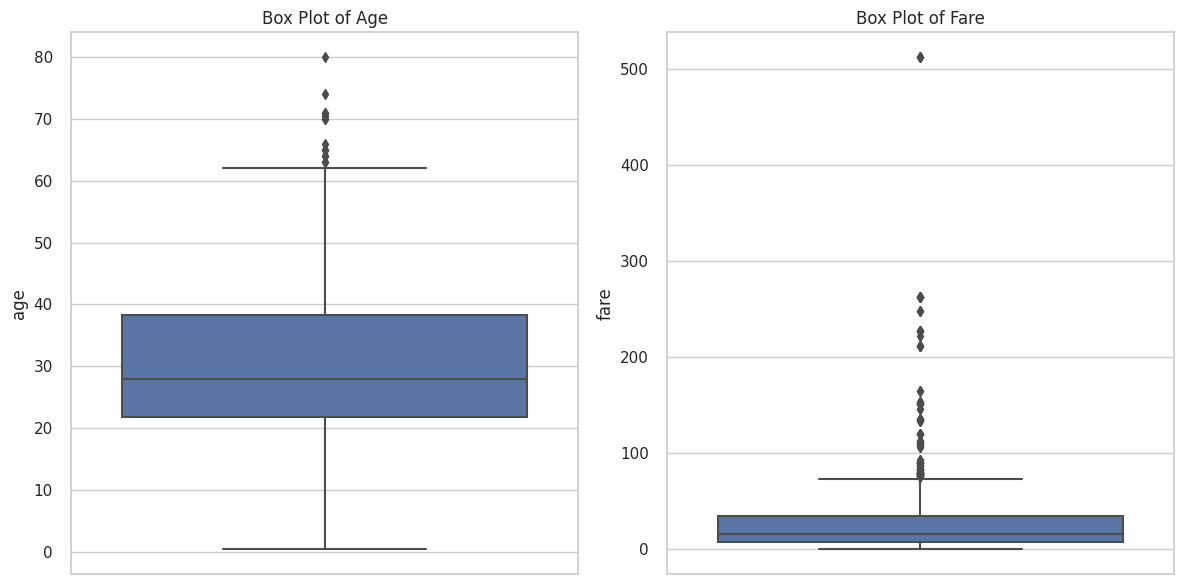

In [21]:
# 2. Box Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['age'])
plt.title('Box Plot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['fare'])
plt.title('Box Plot of Fare')

plt.tight_layout()
plt.show()

The ‘Age’ box plot shows a median around 30, with outliers beyond 60, indicating elderly passengers.

The ‘Fare’ box plot highlights a low median fare with numerous outliers above 300. This confirms the presence of high-value outliers seen in the histogram, underscoring the need for robust scaling, especially for ‘Fare’.

## Detecting and Managing Outliers ##

Outliers can skew your analysis and impact the accuracy of models, so addressing them is essential. In this tutorial, we'll explore several techniques to detect and manage outliers, including boxplots, the interquartile range (IQR), and the z-score method (using the Empirical Rule). These tools will help you spot and decide how to handle extreme values in your dataset.

as we see the boxplot reveals a significant number of outliers in the 'fare' column, with most fares clustered between 0-50, and a few much higher values causing a right-skew in the data. The histogram confirms this skewed distribution, with fares dropping off sharply after 50, indicating that higher fares were rare. Together, these plots reveal a skewed fare distribution with numerous outliers, which could influence statistical analysis if not handled appropriately. This makes sense as the majority of passengers on the Titanic were likely traveling in third class (steerage) or second class, where ticket prices were more affordable, leading to a concentration of fares in the lower range.

**Interquartile Range (IQR):**

Next, let's look at applying the IQR to display the number of outliers and the proportion of dataset these outliers make up. In this code, we are using a loop to iterate over multiple numerical columns and calculate the Interquartile Range (IQR) for each. By using the standard threshold of Q3 + 1.5 * IQR, we identify outliers that exceed this threshold. The loop then stores the number of outliers and their proportion relative to the total number of rows in a results DataFrame, allowing us to efficiently display outliers across all specified columns.

In [22]:
# Using a loop to identify outliers and determine the proportion
column_list = ['survived',
              'pclass',
              'age',
              'sibsp',
              'parch',
              'fare'
              ]

results = []

for column in column_list:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
      
    # Standard threshold using Q3 + 1.5*IQR
    standard_threshold = q3 + 1.5 * iqr
    standard_outliers = (df[column] > standard_threshold).sum()
    proportion = (standard_outliers / len(df)) * 100
    
    results.append([
        column, 
        standard_outliers, 
        f"{proportion:.2f}%"
    ])

# Create a DataFrame to display the results
outlier_df = pd.DataFrame(results, columns=[
    'Column', 
    'Number of Outliers', 
    'Proportion'
])

outlier_df

,Column,Number of Outliers,Proportion
0,survived,0,0.00%
1,pclass,0,0.00%
2,age,15,1.92%
3,sibsp,39,5.00%
4,parch,15,1.92%
5,fare,97,12.44%


It’s important to note that there are several options for handling outliers, such as capping (Winsorizing), transforming the data, analyzing outliers separately, or imputing values. For this tutorial, we’ll focus on removing outliers. If you want to target a specific column and remove rows with outliers, here’s how you can do it. For example, let’s focus on the 'parch' column, which has 15 outliers, leading to a 1.92% data loss.

In [23]:
Q1 = df['parch'].quantile(0.25)
Q3 = df['parch'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = df[(df['parch'] < Q1 - whisker_width*IQR) | (df['parch'] > Q3 + whisker_width*IQR)]

In [24]:
index_out =list(Fare_outliers.index)
index_out

[13, 25, 86, 167, 360, 437, 438, 567, 610, 638, 678, 736, 774, 858, 885]

In [25]:
df_cleand = df.drop(index = index_out)
df_cleand

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.00000,1,0,7.2500,S
1,1,1,female,38.00000,1,0,71.2833,C
2,1,3,female,26.00000,0,0,7.9250,S
3,1,1,female,35.00000,1,0,53.1000,S
4,0,3,male,35.00000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
883,0,2,male,28.00000,0,0,10.5000,S
887,1,1,female,19.00000,0,0,30.0000,S
888,0,3,female,25.14062,1,2,23.4500,S
889,1,1,male,26.00000,0,0,30.0000,C


**Z-Score and the Emperical Rule:**

Now let's look into applying the Z-score. The Z-score method is a statistical approach for detecting outliers in a dataset. It measures how many standard deviations a data point is from the mean. Outliers typically have high or low Z-scores, indicating that they deviate significantly from the average.

The Empirical Rule (also known as the 68-95-99.7 rule) complements this by explaining how data is distributed in a normal distributione mean.

About 68% of data falls within 1 standard deviation of the mean.

About 95% falls within 2 standard deviations.

About 99.7% falls within 3 standard deviations.

Data points with Z-scores outside ±3 are often considered outliers because they are more than three standard deviations away from the mean.

**Note:** This method assumes that the data follows a normal distribution. If the data is skewed or not normally distributed, consider using other methods, like the IQR approach, for more reliable outlier detection.

To apply these statistical methods, we’ll tap into one of Python’s most powerful libraries: SciPy.

In [26]:
from scipy import stats

The histogram plot of 'age' column shows that the distribution is approximately normal, but it is slightly right-skewed. Most of the ages cluster between 20 and 40, forming a bell-shaped curve, but there are some extended tails particularly on the higher end, where fewer passengers are older. While it’s not a perfect bell curve, the distribution is close enough to normal to apply the Z-score method for demonstration purposes. However, be mindful of its limitations due to the skew.

Now, we’ll calculate the mean and standard deviation, which will help us define the boundaries for 1, 2, and 3 standard deviations.

In [27]:
mean = np.mean(df['age'])
std_dev = np.std(df['age'])

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

Mean: 29.696237826557095
Standard Deviation: 13.86296892734764


In [28]:
# 1 standard deviation limits
lower_limit_1 = mean - std_dev
upper_limit_1 = mean + std_dev

# 2 standard deviation limits
lower_limit_2 = mean - 2 * std_dev
upper_limit_2 = mean + 2 * std_dev

# 3 standard deviation limits
lower_limit_3 = mean - 3 * std_dev
upper_limit_3 = mean + 3 * std_dev

Next, let’s figure out what percentage of our data falls within these limits.

In [29]:
within_1_std = ((df['age'] >= lower_limit_1) & (df['age'] <= upper_limit_1)).mean()
within_2_std = ((df['age'] >= lower_limit_2) & (df['age'] <= upper_limit_2)).mean()
within_3_std = ((df['age'] >= lower_limit_3) & (df['age'] <= upper_limit_3)).mean()

print(f"{round(within_1_std * 100, 2)}% of data falls within 1 standard deviation.")
print(f"{round(within_2_std * 100, 2)}% of data falls within 2 standard deviations.")
print(f"{round(within_3_std * 100, 2)}% of data falls within 3 standard deviations.")

73.97% of data falls within 1 standard deviation.
94.23% of data falls within 2 standard deviations.
99.74% of data falls within 3 standard deviations.


*Insight:* The results indicate that the 'age' data in our Titanic dataset follows the Empirical Rule quite closely, with 73.97% of values within 1 standard deviation, 94.23% within 2, and 99.74% within 3 standard deviations. This suggests the data is approximately normally distributed, making the Z-score method appropriate for outlier detection. Although there may be slight skewness, the close alignment with the Empirical Rule indicates that most of the data falls within the expected range, allowing us to confidently use standard statistical techniques for further analysis.

Now, let’s calculate the Z-scores and inspect the data using the .head() function.

In [30]:
df1=df_cleand.copy()

In [31]:
df_cleand['z_score'] = stats.zscore(df['age'], ddof=1)
sample_df = df_cleand[['age', 'z_score']]
sample_df.head()

,age,z_score
0,22.0,-0.554809
1,38.0,0.598605
2,26.0,-0.266456
3,35.0,0.382340
4,35.0,0.382340


This code will identify any data points beyond 3 standard deviations from the mean.

In [32]:
sample_df[(sample_df['z_score'] > 3) | (sample_df['z_score'] < -3)]

,age,z_score
630,80.0,3.626316
851,74.0,3.193786


*Result:* After conducting the Z-score test, we identified four outliers with Z-scores above 3, indicating that these ages (80, and 74) are more than three standard deviations away from the mean. This confirms that these values are statistically unusual in the dataset and may require further investigation. Depending on the context, these outliers could be kept for analysis or addressed if they skew results in future modeling.



For demonstration purposes, to remove the rows with a z-score greater than 3 or less than -3, you can use the following code:

In [33]:
df=df_cleand.drop(index=[630,851])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,z_score
0,0,3,male,22.00000,1,0,7.2500,S,-0.554809
1,1,1,female,38.00000,1,0,71.2833,C,0.598605
2,1,3,female,26.00000,0,0,7.9250,S,-0.266456
3,1,1,female,35.00000,1,0,53.1000,S,0.382340
4,0,3,male,35.00000,0,0,8.0500,S,0.382340
...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.00000,0,0,10.5000,S,-0.122279
887,1,1,female,19.00000,0,0,30.0000,S,-0.771074
888,0,3,female,25.14062,1,2,23.4500,S,-0.328407
889,1,1,male,26.00000,0,0,30.0000,C,-0.266456


In [34]:
df=df.drop(columns='z_score',axis=1)

*Outliers Treatment:*
1.
Flooring and Capping.
2.
Trimmig
3..
Replacing outliers with the mean, median, mode, or other valueriable.

Flooring And Capping:

in this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.

the code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘Fare’ variable.

In [35]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['fare']=np.where(df['fare']>upper_whisker,upper_whisker,np.where(df['fare']<lower_whisker,lower_whisker,df['fare']))

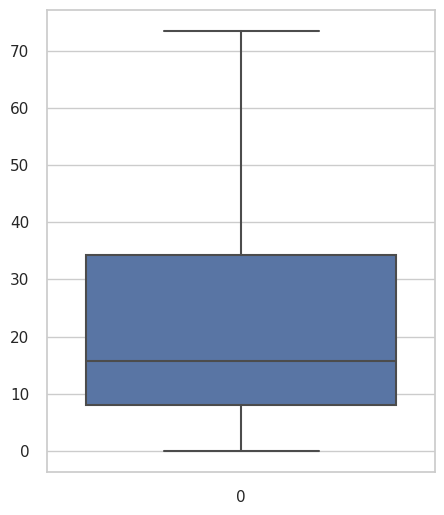

In [36]:
plt.figure(figsize=(5, 6))
sns.boxplot(df['fare']);

now compare the two boxplots with the one before and after the treatment of the outliers.

## Feature Engineering ##

Feature engineering is a crucial step in preparing data for machine learning models. It involves transforming raw data into features that better represent the underlying problem to the predictive models(like Logistic Regression).

In this step, we’ll convert categorical variables into numerical values, which is essential for most machine learning algorithms.

Mapping for binary value categorical data
First, we’ll convert the Sex column into numerical values. This is because many machine learning algorithms require numerical input. We’ll map the values ‘male’ to 0 and ‘female’ to 1.

In [37]:
# Convert 'Sex' to numerical values
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

*One-hot encoding for multi-value categorical data*

One-hot encoding is a method of converting categorical data into numerical data by creating new columns for each unique category. Each column corresponds to a category and contains binary values (0 or 1) indicating the presence or absence of the category in a particular row.
Next, we’ll convert the Embarked column into numerical values using a technique called one-hot encoding

In [38]:
# Convert 'Embarked' to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['embarked'],drop_first=True,dtype=int)

In [39]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,0,3,0,22.00000,1,0,7.2500,0,1
1,1,1,1,38.00000,1,0,71.2833,0,0
2,1,3,1,26.00000,0,0,7.9250,0,1
3,1,1,1,35.00000,1,0,53.1000,0,1
4,0,3,0,35.00000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
883,0,2,0,28.00000,0,0,10.5000,0,1
887,1,1,1,19.00000,0,0,30.0000,0,1
888,0,3,1,25.14062,1,2,23.4500,0,1
889,1,1,0,26.00000,0,0,30.0000,0,0


**Feature Scaling**


We through titanic.describe() saw that the Ages vary from 0 to 80 and the Fares vary from £ 0 to £ 512.

All other columns do not have such variety, and we need to scale these features to prevent dominance by these features and ensure equal contribution by all features.

Here, comes the nice part, we have three kinds of feature scaling techniques:

>*Standardization (Z-score Normalization):*

Standardization scales the features to have a mean of zero and a standard deviation of one. It is useful when the features follow a Gaussian distribution.

>*MinMaxScaler (Normalization):*

Min-Max scaling transforms the features to a fixed range, typically [0, 1]. It is useful when the features do not follow a Gaussian distribution and are required to be within a specific range.

>*Robust Scaling :*

Robust scaling uses the median and the interquartile range (IQR) for scaling. It is useful for datasets with outliers, as it reduces the impact of outliers.

So, here the right question to ask is: Does the data in these two columns follow Gaussian Distribution or not? This means it is plotting time(woohoo!):

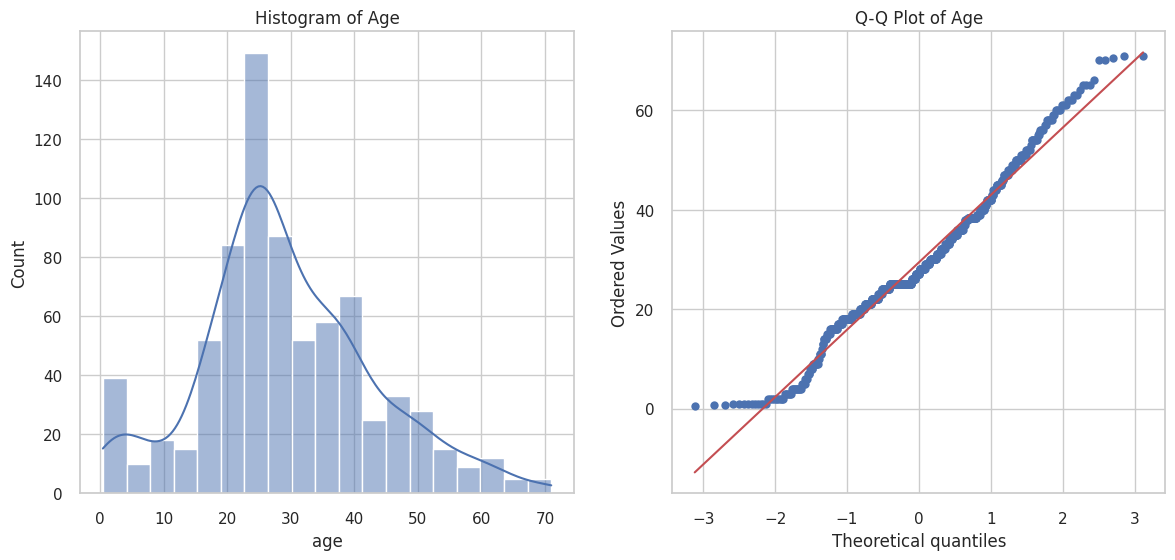

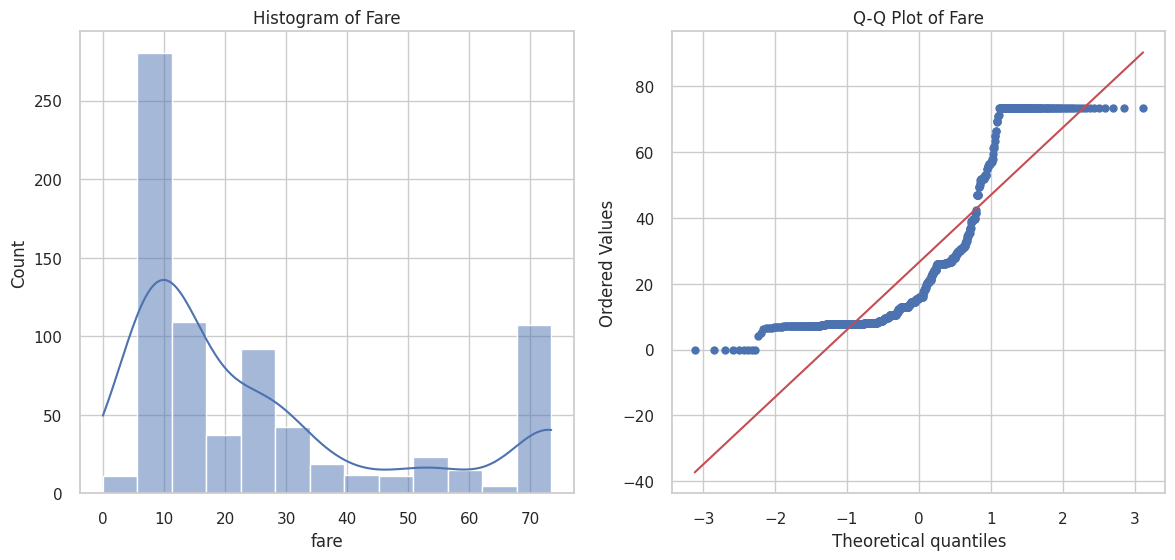

In [40]:
from scipy.stats import shapiro, kstest, norm, probplot

# Histogram and Q-Q Plot for 'Age'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Histogram of Age')

plt.subplot(1, 2, 2)
probplot(df['age'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Age')

plt.show()

# Histogram and Q-Q Plot for 'Fare'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['fare'], kde=True)
plt.title('Histogram of Fare')

plt.subplot(1, 2, 2)
probplot(df['fare'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Fare')

plt.show()

Histograms and Q-Q plots are useful in assessing the normality of the dataset through visualization.

Especially the Q-Q plots, by plotting the quantiles of your data against the quantiles of a normal distribution, you can visually inspect how closely your data follows a normal distribution.

If the points lie on or close to the reference line (usually a 45-degree line), the data is approximately normally distributed. Deviations from this line indicate departures from normality.

So here, we observe that in Age column, the data points follow the red line in the middle but deviate at the tails, especially in the upper range. This means there are some deviations from normality, particularly for extreme ages.

However, for the Fare column we see that the data points, especially at the tails, deviate heavily from the red line, confirming the presence of outliers and skewness. Most passengers paid lower fares, while a few paid much higher amounts.

However, to test our hypothesis if our distributions for Fare and Age are close to normal, we will perform the Kolmogorov-Smirnov test:

In [41]:
from scipy.stats import kstest
import pandas as pd

# Assuming 'df' is your DataFrame containing 'age' and 'fare' columns.

# Kolmogorov-Smirnov Test for Age
# Note: Standardize 'age' before applying the Kolmogorov-Smirnov test
standardized_age = (df['age'] - df['age'].mean()) / df['age'].std()
stat, p = kstest(standardized_age, 'norm')
print('Kolmogorov-Smirnov Test Statistic for Age:', stat)
print('p-value for Age:', p)
if p > 0.05:
    print('The Age data is normally distributed (fail to reject H0)')
else:
    print('The Age data is not normally distributed (reject H0)')

# Kolmogorov-Smirnov Test for Fare
# Note: Standardize 'fare' before applying the Kolmogorov-Smirnov test
standardized_fare = (df['fare'] - df['fare'].mean()) / df['fare'].std()
stat, p = kstest(standardized_fare, 'norm')
print('Kolmogorov-Smirnov Test Statistic for Fare:', stat)
print('p-value for Fare:', p)
if p > 0.05:
    print('The Fare data is normally distributed (fail to reject H0)')
else:
    print('The Fare data is not normally distributed (reject H0)')


Kolmogorov-Smirnov Test Statistic for Age: 0.08097472304282693
p-value for Age: 8.452323339703503e-05
The Age data is not normally distributed (reject H0)
Kolmogorov-Smirnov Test Statistic for Fare: 0.19603520102853267
p-value for Fare: 3.633982842383717e-26
The Fare data is not normally distributed (reject H0)


The p-values for both Age and Fare are very low compared to 0.05 thus indicating both the columns differ greatly from a normal distribution, so, we would go for MinMaxScaler for Age , however, due to the large number of outliers within Fares we would go for Robust scaling. Let’s see how to do it using code.

In [42]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

age_scaler = MinMaxScaler()
fare_scaler = RobustScaler()

# Fit and transform the selected features
df['age'] = age_scaler.fit_transform(df[['age']])
df['fare'] = fare_scaler.fit_transform(df[['fare']])

In [43]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,0,3,0,0.305752,1,0,-0.324756,0,1
1,1,1,1,0.532445,1,0,2.124132,0,0
2,1,3,1,0.362426,0,0,-0.298942,0,1
3,1,1,1,0.489940,1,0,1.428730,0,1
4,0,3,0,0.489940,0,0,-0.294161,0,1


## Correlation Analysis ##



So, to apply correlation analysis here we will first identify what kind of data is within our columns, first, we observe that the data types are as follows:

>*Numerical Continuous: Data that can take any value within a range and has a meaningful order and interval (e.g., Age, Fare)*

>*Ordinal: Categorical data with a meaningful order but not necessarily equidistant between categories (e.g., Pclass)*

>*Nominal: Categorical data without a meaningful order or ranking (e.g., Sex, Embarked, Survived)*

>*Binary (treated as nominal): A special case of nominal data with only two categories, often represented as 0 and 1 (e.g., Sex, Survived).*

Then we see what are some of the correlation measures we could use that are appropriate to the above data types:



1.Numerical Continuous: Pearson or Spearman correlation

2.Ordinal: Spearman or Kendall’s Tau correlation


3.Nominal: Cramer’s V, Chi-Square Test of Independence

Here is a brief overview of what these words mean because we are trying to understand the fundamentals, here:

>*Pearson Correlation:*
Definition: Measures the linear relationship between two continuous variables.
Values: Range from -1 (perfect negative linear relationship) to 1 (perfect positive linear relationship), with 0 indicating no linear relationship.*

>*2. Spearman Rank Correlation:*
Definition: Measures the monotonic relationship between two continuous or ordinal variables.
Values: Range from -1 (perfect negative monotonic relationship) to 1 (perfect positive monotonic relationship), with 0 indicating no monotonic relationship.*

>*3. Kendall’s Tau:*
Definition: Measures the ordinal association between two variables, robust to ties.
Values: Range from -1 (perfect negative ordinal association) to 1 (perfect positive ordinal association), with 0 indicating no ordinal association.*

>*4. Cramer’s V:*
Definition: Measures the association between two nominal variables.
Values: Range from 0 (no association) to 1 (perfect association), with higher values indicating stronger association.*

>*5. Chi-Square Test of Independence:*
Definition: Tests whether two nominal variables are independent.
Values: Provides a p-value, with a low p-value (typically < 0.05) indicating that the variables are likely dependent.*

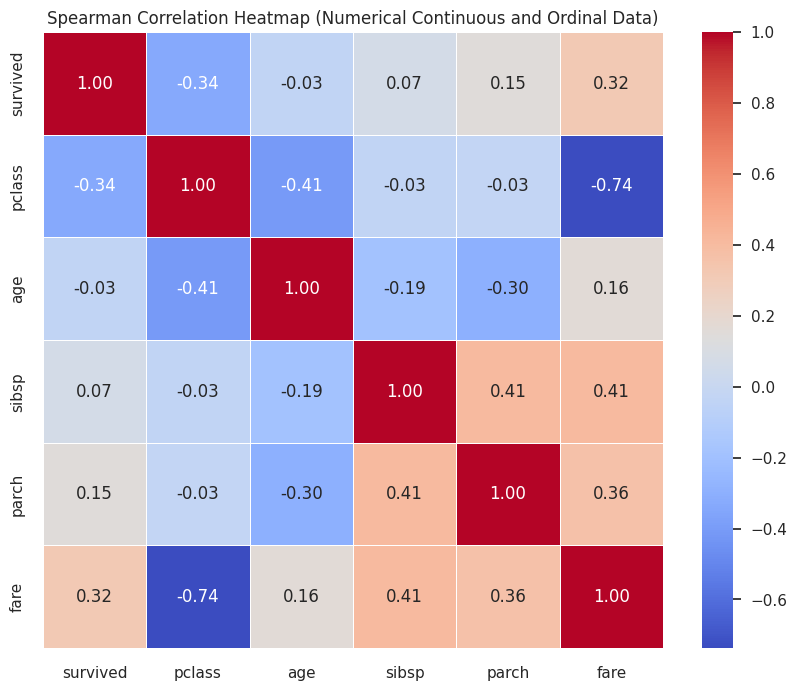

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Spearman correlation matrix for numerical continuous and ordinal variables
spearman_corr = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Correlation Heatmap (Numerical Continuous and Ordinal Data)')
plt.show()

Key Takeaways for the survival column we intend to predict:

-Positively Correlated with Fare (0.32):
Passengers who paid higher fares tend to have higher survival rates.


-Negatively Correlated with Pclass (-0.34):
Lower class passengers (higher Pclass value) tend to have lower survival rates.

-Weak Positive Correlation with SibSp (0.07):
Passengers with more siblings/spouses aboard have a slightly higher chance of survival.

-Weak Positive Correlation with Parch (0.15):
Passengers with more parents/children aboard also have a slightly higher chance of survival.

Now, we will generate a Cramer’s V based correlation matrix for our nominal variables in the Titanic dataset. To achieve this, we will first make a copy of our dataset. Then, we will reconstruct the Embarked_C column in the copied dataset. This approach allows us to examine if there is a correlation between the embarkation point C (Cherbourg) and survival.

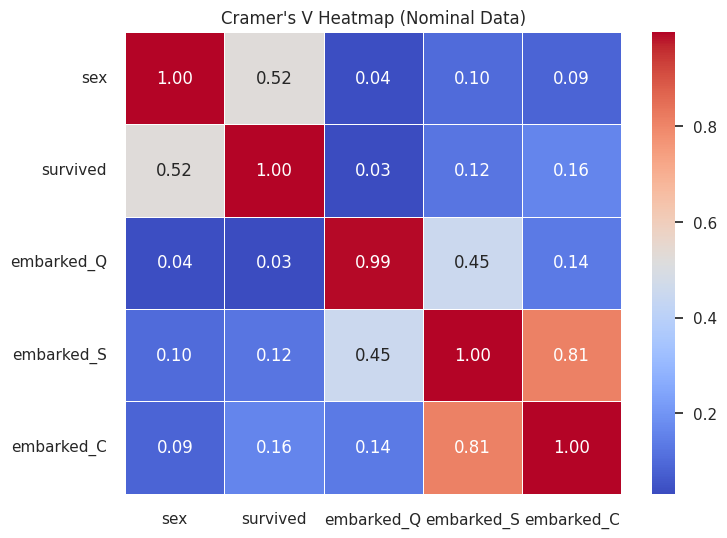

In [45]:
from scipy.stats import chi2_contingency

df_copy = df.copy()
# Bringing back Embarked_C, 
#for easy visualization of correlation between Embakation point C and Survival,
# we will not need it for prediction after we have preprocessed our test data.
df_copy['embarked_C'] = 1 - (df_copy['embarked_Q'] + df_copy['embarked_S'])

nominal_cols = ['sex', 'survived', 'embarked_Q', 'embarked_S', 'embarked_C']


# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.size == 0:
        return np.nan
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Calculate Cramer's V matrix for nominal variables
cramers_v_matrix = pd.DataFrame(index=nominal_cols, columns=nominal_cols)

for col1 in nominal_cols:
    for col2 in nominal_cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df_copy[col1], df_copy
         [col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Cramer\'s V Heatmap (Nominal Data)')
plt.show()


- Sex and Survived (0.51):

There is a moderate association between sex and survival. This suggests that gender played a significant role in survival rates, with women having a higher likelihood of survival compared to men.


- Survived and Embarked_Q (0.03):

There is no significant association between the embarkation point Queenstown (Q) and survival. This indicates that passengers boarding from Queenstown did not have a different likelihood of survival compared to others.
No, it does not mean people from Queenstown did not survive.


-  Survived and Embarked_S (0.1):

There is a weak association between the embarkation point Southampton (S) and survival. This suggests that passengers boarding from Southampton had a slightly different likelihood of survival, but the effect is not strong.


-  Survived and Embarked_C (0.16):

There is a weak association between the embarkation point Cherbourg (C) and survival. This indicates that passengers boarding from Cherbourg had a slightly higher likelihood of survival compared to those from other points, but again, the effect is not strong.

Now, all this analysis will help us perform logistic regression with the most useful, strongly correlated data columns